In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

In [10]:
df=pd.read_csv('/content/50_Startups (1).csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
df['State']=le.fit_transform(df['State'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    int64  
 4   Profit           108 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.3 KB


In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [15]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [16]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

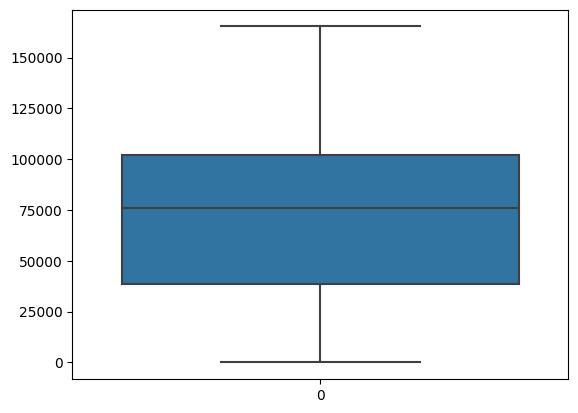

In [17]:
sbs.boxplot(df['R&D Spend'])

In [18]:
x=df.iloc[:,0:4]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [19]:
y=df['Profit']
y

0      192261.83
1      191792.06
2      191050.39
3      182901.99
4      166187.94
         ...    
103    132602.65
104    129917.04
105    126992.93
106    125370.37
107    124266.90
Name: Profit, Length: 108, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.3,random_state=12)

In [22]:
# build ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
req_model=Sequential()
req_model.add(Dense(4,activation='relu'))
req_model.add(Dense(64,activation='relu'))
req_model.add(Dense(32,activation='relu'))
req_model.add(Dense(1,activation='linear'))

In [24]:
req_model.compile(optimizer='adam',loss='mse')

In [25]:
req_model.fit(xtrain,ytrain,batch_size=4,epochs=10)

Epoch 1/10
8/8 [==============================] - 6s 4ms/step - loss: 20635531264.0000
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 10172591104.0000
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 3923588096.0000
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 1395593088.0000
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 882996608.0000
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 999601280.0000
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 960006400.0000
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 872797952.0000
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 815349632.0000
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 813087040.0000


In [27]:
ypred=req_model.predict(xtest)

3/3 [==============================] - 0s 4ms/step


In [31]:
compare=pd.DataFrame(ytest)
compare.columns=['Actual Value of profit']
compare['Predicted Value']=ypred
compare

,Actual Value of profit,Predicted Value
36,90708.19,108533.578125
21,111313.02,147146.140625
19,122776.86,50362.019531
98,149759.96,131426.828125
39,81005.76,84260.164062
...,...,...
72,96778.92,103137.257812
59,118474.03,134048.312500
106,125370.37,137284.890625
32,97427.84,59042.332031


In [32]:
! unzip '/content/Iris dataset.zip'

Archive:  /content/Iris dataset.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [33]:
df=pd.read_csv('/content/Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
df['Species']=le.fit_transform(df['Species'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [35]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [36]:
reqClass_model=Sequential()
reqClass_model.add(Dense(4,activation='relu'))
reqClass_model.add(Dense(64,activation='relu'))
reqClass_model.add(Dense(32,activation='relu'))
reqClass_model.add(Dense(1,activation='softmax'))

In [37]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
reqClass_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
reqClass_model.fit(xtrain,ytrain,epochs=5,batch_size=4,validation_data=(xtest,ytest))

Epoch 1/5
8/8 [==============================] - 1s 37ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


In [42]:
ypred=reqClass_model.predict(xtest)

3/3 [==============================] - 0s 4ms/step
